In [131]:
#Import core libs
import re
import random
import math
import matplotlib.pyplot as plt
import datetime
import os
from operator import add

#Import non-core libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats as stats

#Import Visualization libs
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Category20
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

#Import Prediction libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import r2_score

## Definición de fuente

In [2]:
#Definimos la fuente del archivo (indicar directorio local)
source = "../../DataSets Grandes/properati2.csv"
data = pd.read_csv(source)
#Github repository = "https://github.com/Properati-Analysis/TP2"

## Análisis exploratorio de datos

In [3]:
#Analizamos las columnas
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [4]:
#Analizamos la forma
data.shape

(121220, 26)

In [5]:
#Vemos los primeros datos
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [6]:
#Vemos los nulos del dataset
data.isna().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

## Limpieza de datos

In [7]:
df = data.drop(columns = ["operation","country_name","geonames_id","image_thumbnail","properati_url","lat-lon","price_aprox_local_currency","price_aprox_usd"])

In [8]:
df.shape

(121220, 18)

In [9]:
#Guardo una copia del dataset con nulos
df_with_nan = df

In [94]:
#Hacemos limpieza de los registros que tengan nulo en alguno de los features expresados en el subset, ya que nos interesa tener todos completos, y no podríamos inferirlos
df = df.dropna(subset=['price','property_type', "surface_covered_in_m2","surface_total_in_m2"], how='any')
df = df.dropna(subset=["place_name"], how='any')

In [95]:
df.shape

(32946, 18)

In [12]:
df = df[df.currency == "USD"]

In [13]:
df.shape

(55795, 18)

In [14]:
#Filtros
apart = df.property_type == "apartment"
ph = df.property_type == "PH"
house = df.property_type == "house"
store = df.property_type == "store"

In [15]:
ap_price_ol = df[apart]["price"].quantile(0.75) + (1.5 * (df[apart]["price"].quantile(0.75) - df[apart]["price"].quantile(0.25)))
ap_sup_ol = df[apart]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[apart]["surface_covered_in_m2"].quantile(0.75) - df[apart]["surface_covered_in_m2"].quantile(0.25)))

In [16]:
ph_price_ol = df[ph]["price"].quantile(0.75) + (1.5 * (df[ph]["price"].quantile(0.75) - df[ph]["price"].quantile(0.25)))
ph_sup_ol = df[ph]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[ph]["surface_covered_in_m2"].quantile(0.75) - df[ph]["surface_covered_in_m2"].quantile(0.25)))

In [17]:
ho_price_ol = df[house]["price"].quantile(0.75) + (1.5 * (df[house]["price"].quantile(0.75) - df[house]["price"].quantile(0.25)))
ho_sup_ol = df[house]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[house]["surface_covered_in_m2"].quantile(0.75) - df[house]["surface_covered_in_m2"].quantile(0.25)))

In [18]:
st_price_ol = df[store]["price"].quantile(0.75) + (1.5 * (df[store]["price"].quantile(0.75) - df[store]["price"].quantile(0.25)))
st_sup_ol = df[store]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[store]["surface_covered_in_m2"].quantile(0.75) - df[store]["surface_covered_in_m2"].quantile(0.25)))

In [20]:
#Guardo copia para análisis exploratorio de los valores elevados
#df_high = df[df["surface_covered_in_m2"] > surface_covered_in_m2_ol]
df_high = df[df["price"] > ph_price_ol]

In [21]:
#Limpieza genérica, sin consideración de tipo de propiedad
surface_covered_in_m2_ol = df["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df["surface_covered_in_m2"].quantile(0.75) - df["surface_covered_in_m2"].quantile(0.25)))

In [22]:
#Limpieza genérica, sin consideración de tipo de propiedad
#df = df[df["surface_covered_in_m2"] < surface_covered_in_m2_ol]

In [23]:
df_ap = df[apart]
df_ap = df_ap[df_ap.price < ap_price_ol]
df_ap = df_ap[df_ap.surface_covered_in_m2 < ap_sup_ol]
#df_ap.describe()

In [24]:
df_ph = df[ph]
df_ph = df_ph[df_ph.price < ph_price_ol]
df_ph = df_ph[df_ph.surface_covered_in_m2 < ph_sup_ol]
#df_ph.describe()

In [25]:
df_ho = df[house]
df_ho = df_ho[df_ho.price < ho_price_ol]
df_ho = df_ho[df_ho.surface_covered_in_m2 < ho_sup_ol]
#df_ho.describe()

In [26]:
df_st = df[store]
df_st = df_st[df_st.price < st_price_ol]
df_st = df_st[df_st.surface_covered_in_m2 < st_sup_ol]
#df_st.describe()

In [27]:
df.shape

(55795, 18)

In [28]:
df_high.shape

(14256, 18)

In [29]:
frames = [df_ap,df_ph,df_ho,df_st]
df = pd.concat(frames)

In [30]:
#Nos quedamos solo con la superficie que guarda relación con la física
df = df[df.surface_covered_in_m2 < df.surface_total_in_m2]

In [31]:
df[df.property_type == "apartment"].isna().sum()

Unnamed: 0                     0
property_type                  0
place_name                     1
place_with_parent_names        0
state_name                     0
lat                         7289
lon                         7289
price                          0
currency                       0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
price_per_m2                   2
floor                      17889
rooms                      11541
expenses                   14772
description                    0
title                          0
dtype: int64

In [32]:
df.shape

(32954, 18)

<AxesSubplot:>

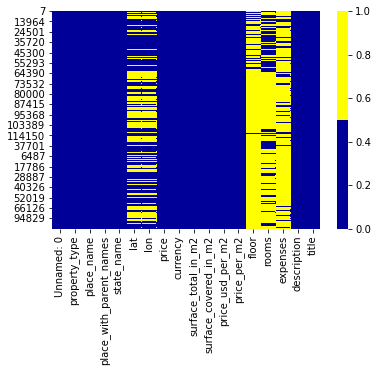

In [33]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [34]:
df.property_type.value_counts()

apartment    19711
house        11105
PH            1835
store          303
Name: property_type, dtype: int64

In [35]:
df_high.property_type.value_counts()

house        7961
apartment    5392
store         740
PH            163
Name: property_type, dtype: int64

In [56]:
df.surface_covered_in_m2.isna().groupby(df.property_type).value_counts()

property_type  surface_covered_in_m2
PH             False                     1835
apartment      False                    19711
house          False                    11105
store          False                      303
Name: surface_covered_in_m2, dtype: int64

In [57]:
df.surface_covered_in_m2.notna().groupby(df.property_type).value_counts()

property_type  surface_covered_in_m2
PH             True                      1835
apartment      True                     19711
house          True                     11105
store          True                       303
Name: surface_covered_in_m2, dtype: int64

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

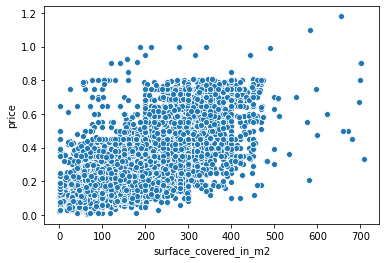

In [36]:
sns.scatterplot(x = "surface_covered_in_m2", y = df.price/1000000, data = df)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

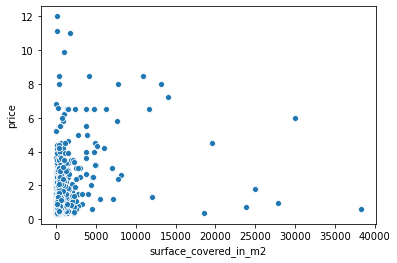

In [37]:
sns.scatterplot(x = "surface_covered_in_m2", y = df_high.price/1000000, data = df_high)

In [38]:
df["price"].max()

1180000.0

In [39]:
df_high["price"].max()

12000000.0

In [40]:
#Analizamos los propiedades con los valores más elevados
df[df["price"]==df["price"].max()].head()

,Unnamed: 0,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
85809,85809,store,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,NaN,NaN,1180000.0,USD,710.0,656.0,1661.971831,1798.780488,NaN,NaN,NaN,VENTA DE HOTEL (fondo de comercio + propiedad)...,VENTA DE HOTEL EN PALERMO 27 Habitaciones c/ba...
86260,86260,store,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,NaN,NaN,1180000.0,USD,710.0,656.0,1661.971831,1798.780488,NaN,NaN,NaN,VENTA DE HOTEL (fondo de comercio + propiedad)...,EDIFICIO PB 3 PISOS 710m2 totales. - HOTEL 2...


<AxesSubplot:xlabel='rooms', ylabel='price'>

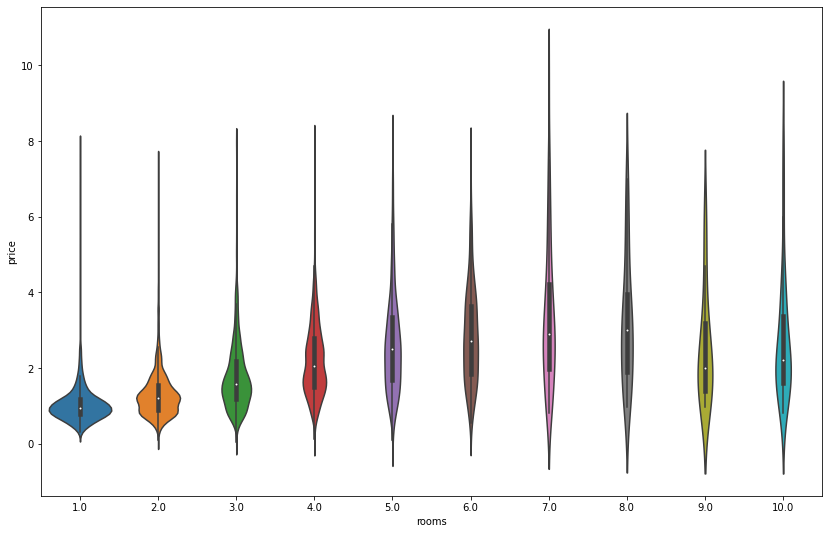

In [41]:
#Analizamos la distribución de los valores de las propiedades del dataset limpio, en relación a la cantidad de rooms
plt.figure(figsize=(14,9))
sns.violinplot(df.rooms[df.rooms<11],df.price/100000)

<AxesSubplot:xlabel='rooms', ylabel='price'>

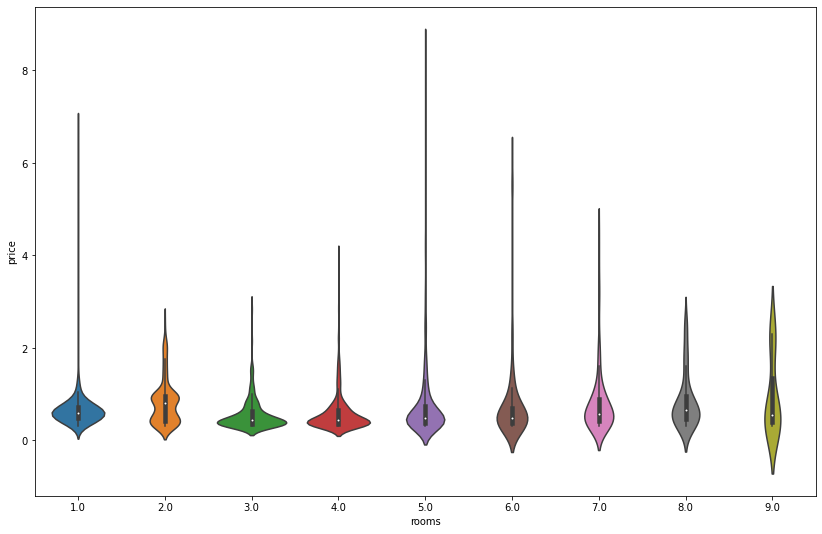

In [42]:
#Analizamos la distribución de los valores de las propiedades más caras en relación a la cantidad de rooms
plt.figure(figsize=(14,9))
sns.violinplot(df_high.rooms[df_high.rooms<10],df_high.price/1000000)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

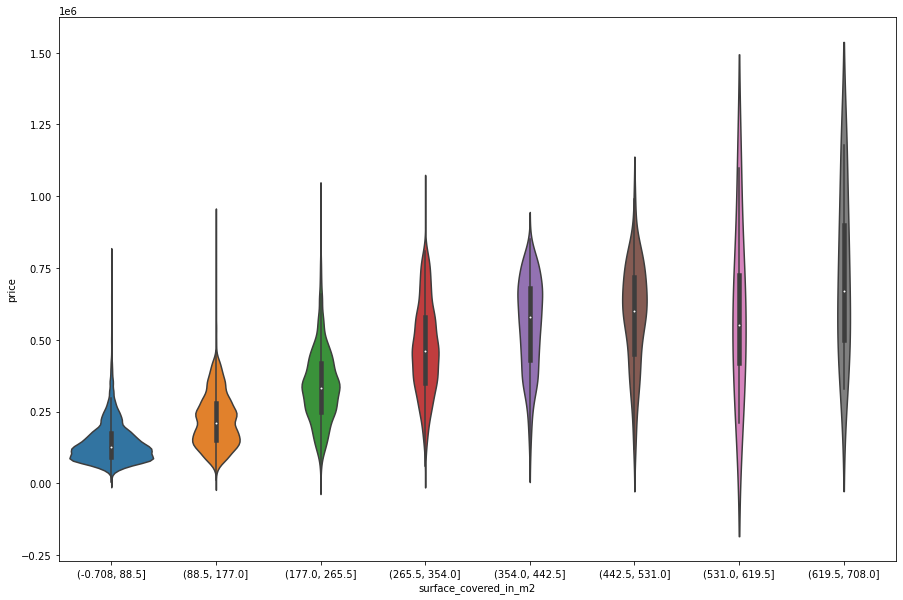

In [43]:
#Analizamos el valor de las propiedadse por rango de metros cuadrados cubiertos
plt.figure(figsize=(15,10))
sns.violinplot(pd.cut(df.surface_covered_in_m2,8),df.price)

In [44]:
#Generamos un df nuevo con menos variables para analizar la relación en un pairplot
df2 = df[["price","property_type","surface_covered_in_m2","rooms"]]

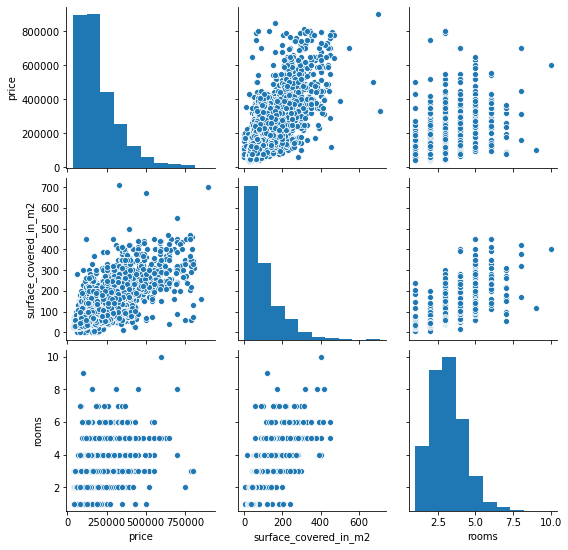

In [45]:
#Analizamos las propiedades del dataset limpio en el pairplot para evaluar si se mantiene una relación lineal de algún tipo
sns.pairplot(df2.sample(5000))

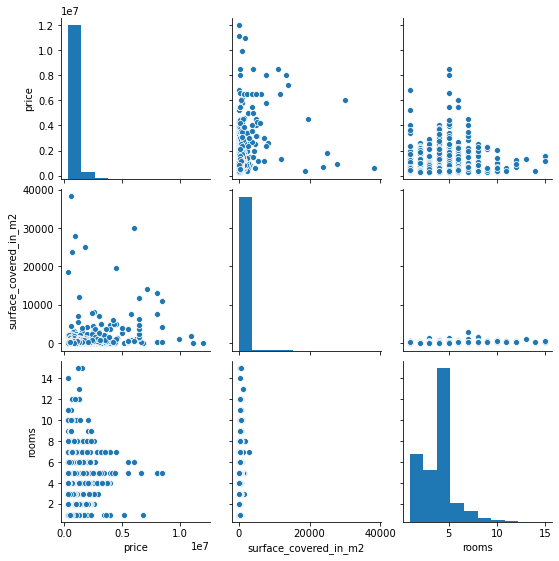

In [46]:
#Analizamos las propiedades más caras en el pairplot para evaluar si se mantiene una relación lineal de algún tipo
df3 = df_high[["price","property_type","surface_covered_in_m2","rooms"]]
sns.pairplot(df3)

<Figure size 864x576 with 0 Axes>

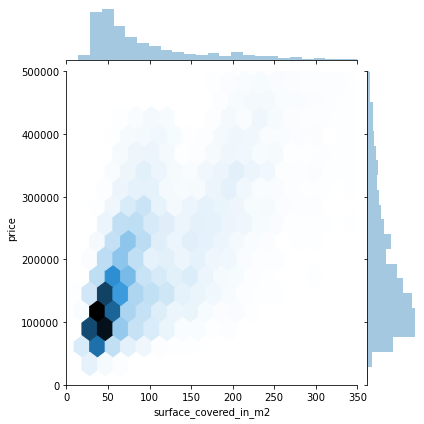

In [47]:
#Generamos un jointplot
plt.figure(figsize=(12,8))
sns.jointplot(x='surface_covered_in_m2', y='price', data=df, kind='hex', 
              gridsize=38, xlim = (0,350), ylim = (0,500000))

## Regresión lineal múltiple

In [135]:
dummies = pd.get_dummies(df.loc[:,'property_type'], drop_first=True)
dummies_place = pd.get_dummies(df.loc[:,'state_name'], drop_first=True)
dummies_place_names = pd.get_dummies(df.loc[:,'place_name'], drop_first=True)

In [ ]:
dummies_place.columns

In [ ]:
df_dummies  = pd.concat([df,dummies], axis = 1)
df_dummies_place  = pd.concat([df,dummies_place,dummies], axis = 1)
df_dummies_place_names  = pd.concat([df_prepare,dummies_place,dummies,dummies_place_names], axis = 1)

In [ ]:
barrios = df_dummies.place_name.apply(lambda x: x in ["Belgrano", "Caballito", "Palermo", "Almagro", "Villa Crespo"])
df_prepared = pd.concat([df_dummies[barrios], pd.get_dummies(df[barrios].place_name, drop_first=True)], axis=1)
df_prepared

In [ ]:
df_dummies_place

In [137]:
feature_cols_dum = ["surface_covered_in_m2","apartment","house","store"]
feature_cols_dum2 = ["surface_covered_in_m2","apartment","house","store",'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Buenos Aires Interior',
       'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Corrientes',
       'Córdoba', 'Entre Ríos', 'Jujuy', 'La Pampa', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Luis', 'Santa Cruz', 'Santa Fe',
       'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']
feature_cols_dum3 = ['surface_covered_in_m2', 'apartment', 'house', 'store', "Belgrano", "Caballito", "Palermo", "Villa Crespo"]

In [124]:
X = df_dummies_place[feature_cols_dum2]
y = df_dummies_place['price']

In [145]:
X3 = df_prepared[feature_cols_dum3]
y3 = df_prepared['price']

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels. api as sm

In [63]:
linreg = LinearRegression()

In [125]:
linreg.fit(X, y)

LinearRegression()

In [66]:
from sklearn.model_selection import train_test_split

In [ ]:
#np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [126]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

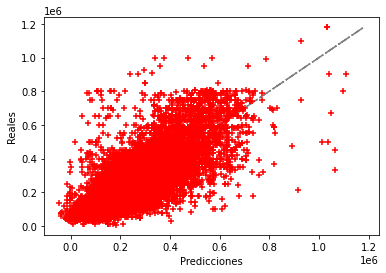

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              9755.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                        0.00
Time:                        21:20:19   Log-Likelihood:                     -4.1861e+05
No. Observations:               32946   AIC:                                  8.373e+05
Df Residuals:                   32918   BIC:                                  8.375e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
surface_covered_in_m2         1479.4258      7.602    194.612      0.000    1464.526    1494.326
apartment                     8.408e+04   1043.602     80.570      0.000     8.2e+04    8.61e+04
house                          3.91e+04   1717.358     22.767      0.000    3.57e+04    4.25e+04
store                         5.883e+04   4896.241     12.016      0.000    4.92e+04    6.84e+04
Bs.As. G.B.A. Zona Oeste     -5.594e+04   1696.490    -32.977      0.000   -5.93e+04   -5.26e+04
Bs.As. G.B.A. Zona Sur        -4.18e+04   1638.901    -25.502      0.000    -4.5e+04   -3.86e+04
Buenos Aires Costa Atlántica -5.642e+04   1727.195    -32.663      0.000   -5.98e+04    -5.3e+04
Buenos Aires Interior        -8.968e+04   3666.168    -24.462      0.000   -9.69e+04   -8.25e+04
Capital Federal               4126.9500   1106.740      3.729      0.000    1957.699    6296.201
Catamarca                     5850.9970   5.65e+04      0.104      0.917   -1.05e+05    1.16e+05
Chaco                        -1.625e+05   3.57e+04     -4.546      0.000   -2.33e+05   -9.24e+04
Chubut                        1.158e+04   3.26e+04      0.355      0.722   -5.23e+04    7.55e+04
Corrientes                   -2.706e+04   8849.591     -3.057      0.002   -4.44e+04   -9710.658
Córdoba                      -8.573e+04   3089.113    -27.751      0.000   -9.18e+04   -7.97e+04
Entre Ríos                   -5.272e+04      2e+04     -2.640      0.008   -9.19e+04   -1.36e+04
Jujuy                         3.603e+05   5.65e+04      6.383      0.000     2.5e+05    4.71e+05
La Pampa                      -1.65e+05   7.98e+04     -2.067      0.039   -3.21e+05   -8521.451
Mendoza                      -1.063e+04   1.83e+04     -0.580      0.562   -4.66e+04    2.53e+04
Misiones                     -8.071e+04   2.22e+04     -3.642      0.000   -1.24e+05   -3.73e+04
Neuquén                       1.234e+04      1e+04      1.233      0.217   -7272.484     3.2e+04
Río Negro                     2828.7168   1.33e+04      0.212      0.832   -2.33e+04    2.89e+04
Salta                        -1.215e+05   2.41e+04     -5.046      0.000   -1.69e+05   -7.43e+04
San Luis                      -3.01e+04   1.21e+04     -2.492      0.013   -5.38e+04   -6427.615
Santa Cruz                   -1.083e+05   5.64e+04     -1.919      0.055   -2.19e+05    2316.914
Santa Fe                     -5.658e+04   3765.483    -15.025      0.000    -6.4e+04   -4.92e+04
Santiago Del Estero          -2.159e+05   5.65e+04     -3.825      0.000   -3.27e+05   -1.05e+05
Tierra Del Fuego             -1.558e+04   3.02e+04     -0.516      0.606   -7.48e+04    4.36e+04
Tucumán                      -6.928e+04   3.57e+04     -1.940      0.052  

In [127]:
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

display (model.summary())

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

In [90]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

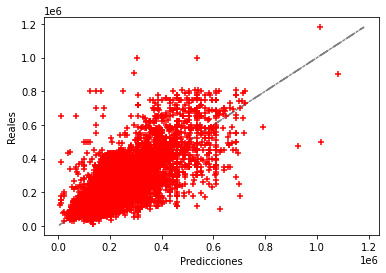

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          3.937e+04
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                        0.00
Time:                        21:09:27   Log-Likelihood:                     -2.7340e+05
No. Observations:               21420   AIC:                                  5.468e+05
Df Residuals:                   21416   BIC:                                  5.468e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1503.9765      9.833    152.959      0.000    1484.704    1523.249
apartment              7.314e+04    931.958     78.476      0.000    7.13e+04     7.5e+04
house                  9401.8149   2096.651      4.484      0.000    5292.222    1.35e+04
store                  2.288e+04   6279.321      3.644      0.000    1.06e+04    3.52e+04
==============================================================================
Omnibus:                     4925.593   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47452.619
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                      10.100   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

display (model.summary())

In [150]:
def train_test_rmse_reg(feature_cols, df, target='price'):
    X = df[feature_cols]
    y = df[target]
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rlm = linear_model.RidgeCV(alphas=np.logspace(0.0001, 10, 1000), normalize=True, cv=5)
    ridge_model = rlm.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)
    
    lassocv = linear_model.LassoCV(alphas=np.linspace(0.0001, 10, 1000), cv=5, normalize=True)
    lasso_model = lassocv.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)
    return ((np.sqrt(metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)), 
            (np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),r2_score(y_test, ridge_pred)),
            (np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)), r2_score(y_test, lasso_pred))
           )


In [159]:
def train_test_rmse_reg_ridge(feature_cols, df, target='price'):
    X = df[feature_cols]
    y = df[target]
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    rlm = linear_model.RidgeCV(alphas=np.logspace(0.0001, 10, 1000), normalize=True, cv=5)
    ridge_model = rlm.fit(X_train, y_train)
    ridge_pred_train = ridge_model.predict(X_train)
    ridge_pred_test = ridge_model.predict(X_test)
    return (r2_score(y_train, ridge_pred_train),r2_score(y_test, ridge_pred_test))

In [134]:
train_test_rmse_reg(feature_cols_dum,df_dummies_place,target='price')

((120703.08231260377, 0.46660349522693545),
 (120692.13724245389, 0.4667002251092178),
 (120703.05417340712, 0.4666037439255951))

In [147]:
train_test_rmse_reg(feature_cols_dum3, df_prepared) #Con linspace en ridge

((96534.93770562712, 0.5156412837944383),
 (95398.45169315157, 0.5269786638566332),
 (96534.92948307339, 0.5156413663068529))

In [151]:
train_test_rmse_reg(feature_cols_dum3, df_prepared) #Con logspace en ridge

((96534.93770562712, 0.5156412837944383),
 (79385.31959176119, 0.6724493443181523),
 (96534.92948307339, 0.5156413663068529))

In [160]:
train_test_rmse_reg_ridge(feature_cols_dum3, df_prepared)

(0.5533480553302542, 0.6724493443181523)